## Librerias

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation
import scipy.integrate as integ

In [2]:
# plt.rcParams['text.usetex'] = True  #Para tener tipografia lateX, usar antes de exportar los graficos

![diagrama](HP_grafico_paper4.1.png)
![resistencias](HP_Res_paper4.2.png)

## defino paramatros (tambien se podria hacer desde un .txt)

In [ ]:
## Heat pipe geometry ##
R0=10 # external radius (m)
Rw=1 # wick radius (m)
Rv=1 # vapor radius (m)

Le=1 # evaporator length (m)
La=1 # adiabatic length (m)
Lc=1 # condenser length (m)

## Heat pipe materials properties ##
Kw=1 # wall thermal conductivity (W/m.K)
Keff=1 # effective thermal conductivity of wick (W/m.K) hay que usar un modelo
R=1 # ideal gas constant
Tv=1 # vapor duct temperature (k)
r=1 # heat of vaporization (J/kg)
p=18 # water molecular weight 


In [ ]:
## radiator geometry ##
Lr=1 
Wr=1
tr=1
Ar=Lr*Wr
## radiator materials properties ##




<div class="alert alert-warning">

**A tener en cuenta:** Solo hay concenso para definir R1 y R7! Para las otras hay que definir modelos y dependen del **fluido del HP**

</div>

<div class="alert alert-success">

**tip:** Todos desprecian **R8** y **R9**

</div>

In [ ]:
R1= np.log(R0/Rw)/(2*np.pi*Kw*Le) #(K/W)

R7= np.log(R0/Rw)/(2*np.pi*Kw*Lc)

In [ ]:
Req=R1+R7 #... + otras

$\Delta T_{HP}=R_{eq}Q_{HP}$

$\Delta T_{HP}=T_{source}-T_{sink}$

## ahora hay que calcular $Q_{rad}$ usando una hipotetica $T_{sink}$ (temperatura de la pared en la zona de condensacion)

## se supone que conozco la T de fuente osea, con la que llega el fluido al primer HP

 ## se asume que todos los HP EXTRAEN EL MISMO CALOR AL FLUIDO (leer un poco sobre intercambiadores de calor en serie para ver si esto tiene sentido)

In [ ]:
Q_sink=10
n=10 #number of  HPs
Q_HP= Q_sink/n 

In [ ]:
T_sink=T_source-Req*Q_HP

## optimizacion tamano radiador

In [ ]:
##constantes full inventadas
k = 800 # conductividad del carbono W/(m-K)
stefanBoltz = 5.670373e-8 # constante de Stefan-Boltzmann  W/(m^2-K^4)
emiss = .85 # emisividad

Lx=0.1 # van a cambiar varia de 0.07-0.09
Ly=0.5 # van a cambiar varia de 0.5-0.80
Lz=1e-3 # asumo fijo, tomo un valor que parece estandar segun los papers

T_HPcond=500 
T_inf=200
o_inf=1

alphai=emiss*stefanBoltz*Lx**2*T_inf**3/k/Lz

N=200
x_span = (0,1) # esta adimensional
x= np.linspace(*x_span, N) 

In [ ]:

def heat_radiation(x,x0):
    global alphai
    #global i
    f=x0[0]
    f1=x0[1]
    df=f1
    df1=alphai*(f**4-o_inf4)
    return df,df1

def simulate_HR(x0):
    global x
    global x_span
    r = integ.solve_ivp(heat_radiation, x_span, x0, t_eval=x,method='LSODA') #Radau
    return r.y

def find_q_wall(T_HPcondi,N):
    
    global T_inf
    xo=T_HPcondi/T_inf
    r=1500
    ix=np.linspace(-5,0,r+1)
    i_god=0
    tol=1e-2
    for i in range(r):
        x0=[xo,ix[i]]
        _,f1=simulate_HR(x0)
        if np.abs(f1[N-1])<tol:
            i_god=i         
    x0=[xo,ix[i_god]]
    return x0,i_god



In [ ]:

x0,i_god=find_q_wall(T_HPcond)
f,f1=simulate_HR(x0)

In [ ]:
print(f"q(0)={f1[0]}; q(1)={f1[N-1]}")

In [ ]:
N1=10
N2=20
Lx_span=(0.07,0.09)
Lx= np.linspace(*Lx_span, N1)
alpha_=emiss*stefanBoltz*Lx**2*T_inf**3/k/Lz

Ly_span=(0.5,0.8)
Ly= np.linspace(*Ly_span, N1) 


T_cond_span=(250,1100)
T_cond=np.linspace(*T_cond_span, N2)



In [ ]:
q0=np.zeros([N1,N2])
q0_m=np.zeros([N1,N2])

In [ ]:
for i in range(N1):
    for j in range(N2):
        alphai=alpha_[i]
        x0,i_god=find_q_wall(T_cond[j])
        f,f1=simulate_HR(x0)
        #print(f"q(0)={f1[0]}; q(1)={f1[N-1]}")
        q0[i,j]=f1[0]
        q0_m[i,j]=-f1[0]/Lx[i]**2
    
    

In [ ]:
%matplotlib inline
plt.plot(Lx,-q0[:,5],'.',label= "$T^*(z)$")
#plt.plot(z,f1,'.',label= "o1(y)")
#plt.axhline(color="red",y=o_inf, xmin=0, xmax=1,label="$T^*_{inf}$")
#plt.xlim(-1,1.1)
#plt.ylim(-1.,1)
plt.xlabel('z')
plt.ylabel('T')
plt.title('Perfil de Temperatura $T^*(z)$')

plt.legend()
plt.grid()
plt.show()

In [ ]:
plt.plot(T_cond,-q0[1,:],'.',label= "$T^*(z)$")
#plt.plot(z,f1,'.',label= "o1(y)")
#plt.axhline(color="red",y=o_inf, xmin=0, xmax=1,label="$T^*_{inf}$")
#plt.xlim(-1,1.1)
#plt.ylim(-1.,1)
plt.xlabel('z')
plt.ylabel('T')
plt.title('Perfil de Temperatura $T^*(z)$')

plt.legend()
plt.grid()
plt.show()

In [ ]:
plt.xlabel("x")
plt.ylabel("y")
plt.pcolormesh(-q0, cmap='turbo') #vmin=0, vmax=100) 
plt.colorbar()
plt.show()

In [ ]:
plt.figure()
plt.xlabel("x")
plt.ylabel("y")
plt.pcolormesh(q0_m, cmap='turbo') #vmin=0, vmax=100) 
plt.colorbar()
plt.show()

In [ ]:
for i in range(N2):
    plt.plot(Lx,q0_m[:,i],'.',label= f"{i}")
#plt.plot(z,f1,'.',label= "o1(y)")
#plt.axhline(color="red",y=o_inf, xmin=0, xmax=1,label="$T^*_{inf}$")
#plt.xlim(-1,1.1)
#plt.ylim(-1.,1)
#plt.xlabel('z')
#plt.ylabel('T')
#plt.title('Perfil de Temperatura $T^*(z)$')

plt.legend()
plt.grid()
plt.show()

In [ ]:
for i in range(N1):
    plt.plot(T_cond,q0_m[i,:],'.',label= f"{i}")
#plt.plot(z,f1,'.',label= "o1(y)")
#plt.axhline(color="red",y=o_inf, xmin=0, xmax=1,label="$T^*_{inf}$")
#plt.xlim(-1,1.1)
#plt.ylim(-1.,1)
#plt.xlabel('z')
#plt.ylabel('T')
#plt.title('Perfil de Temperatura $T^*(z)$')

plt.legend()
plt.grid()
plt.show()

In [ ]:
X, Y = np.meshgrid(T_cond,Lx)


In [ ]:


fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, q0, cmap='turbo')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');



In [ ]:


fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, q0_m, cmap='turbo')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');



# version final: Optimizacion tamano del fin o aleta radiadora


## $k\frac{d^2T}{dx^2}=\epsilon \sigma (T^4-T^4_s)/L_z$

Adimensiono:
## $\tilde{x}=\frac{x}{L_x},\tilde{T}=\frac{T}{T_{HP,c}}$

## $\frac{d^2\tilde{T}}{d\tilde{x}^2}= \alpha  (\tilde{T}^4-\tilde{T}^4_s)$

donde:
## $\alpha= \frac{\epsilon \sigma L_x^2 T^3_{HP,c} }{k L_z} $

In [31]:
def heat_radiation(x,x0):
    global alphai
    global o_infi4
    f=x0[0]
    f1=x0[1]
    df=f1
    df1=alphai*(f**4-o_infi4)
    return df,df1

def simulate_HR(x0):
    global x
    global x_span
    r = integ.solve_ivp(heat_radiation, x_span, x0, t_eval=x,method='RK45') #Radau
    return r.y

def find_q_wall(N):
    global o_infi
    xo=1
    r=2000
    ix=np.linspace(-3,0,r+1)
    i_god=0
    tol=1e-2
    for i in range(r):
        x0=[xo,ix[i]]
        f,f1=simulate_HR(x0)
        if np.abs(f1[N-1])<tol and f[N-1]>o_infi:
            i_god=i         
            x0=[xo,ix[i_god]]
            return x0,i_god
    return NULL 


In [32]:
def a(Lx,T_cond):
    global emiss
    global stefanBoltz
    global k
    global Lz
    return emiss*stefanBoltz*Lx**2*T_cond**3/k/Lz #return alpha

In [5]:
N=100
x_span = (0,1) # esta adimensional
x= np.linspace(*x_span, N) 
T_inf=200

In [6]:
##constantes sacadas de  Lightweight High-Temperature Radiator for In-Space Nuclear-Elect
k = 800 # conductividad del carbono W/(m-K)
stefanBoltz = 5.670373e-8 # constante de Stefan-Boltzmann  W/(m^2-K^4)
emiss = .85 # emisividad
Lz=0.4e-3 # asumo fijo, tomo un valor que parece estandar segun los papers
rho=2000 # kg/m3

In [7]:
Lz

0.0004

In [17]:
N1=20
N2=10
Lx_span=(0.01,0.4)
Lx= np.linspace(*Lx_span, N1)

#Ly_span=(0.5,0.8)
#Ly= np.linspace(*Ly_span, N1) 
Ly=0.8 # Q varia linealmente con esto

T_cond_span=(500,900)
T_cond=np.linspace(*T_cond_span, N2)

o_inf=T_inf/T_cond
o_inf4=o_inf**4

X, Y = np.meshgrid(T_cond,Lx)
alpha_=a(Y,X)

In [9]:
alpha_[3,4]

0.24027753444799993

In [10]:
emiss*stefanBoltz*Lx[3]**2*T_cond[4]**3/k/Lz

0.24027753444799993

In [12]:
q01=np.zeros([N1,N2])
q0_m1=np.zeros([N1,N2])
T_1=np.zeros([N1,N2]) # temperatura en la punta de la aleta

In [610]:
for i in range(N1):
    for j in range(N2):
        alphai=alpha_[i,j]
        o_infi=o_inf[j]
        o_infi4=o_inf4[j]
        x0,_=find_q_wall(N)
        f,f1=simulate_HR(x0)
        #print(f" i={i},j={j}")
        #print(f"q(0)={f1[0]}; q(1)={f1[N-1]}, i={i},j={j}")
        if f[N-1]<(o_infi):
            print(f"hay un problema en, i={i},j={j} ; valores criticos")
        T_1[i,j]=f[N-1]*T_cond[j]
        #q02[i,j]=-f1[0]*T_cond[j]*k*Ly*Lz/Lx[i]
        #q0_m2[i,j]=-f1[0]*T_cond[j]*k/Lx[i]**2/rho
        integral=integ.simpson((f**4-o_infi4),x)
        q01[i,j]=Lx[i]*Ly*emiss*stefanBoltz*T_cond[j]**4*integral
        q0_m1[i,j]=emiss*stefanBoltz*T_cond[j]**4*integral/Lz/rho
    
      

In [15]:
# Esto para despues recargar los datos
q01=np.loadtxt('optimizacion_fin/q.txt')
q0_m1=np.loadtxt('optimizacion_fin/q_m.txt')
Lx=np.loadtxt('optimizacion_fin/Lx.txt')
T_cond=np.loadtxt('optimizacion_fin/T_cond.txt')

In [23]:
alphai=alpha_[N1-1,N2-1]
o_infi=o_inf[N2-1]
o_infi4=o_inf4[N2-1]
x0,_=find_q_wall(N)
f,f1=simulate_HR(x0)

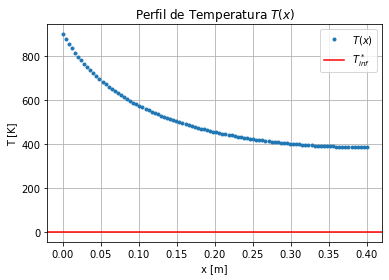

In [33]:
plt.plot(x*Lx[N1-1],f*T_cond[N2-1],'.',label= "$T(x)$")
plt.axhline(color="red",y=T_inf/T_cond[N2-1], xmin=0, xmax=1,label="$T^*_{inf}$")
plt.xlabel('x [m]')
plt.ylabel('T [K]')
plt.title('Perfil de Temperatura $T(x)$')
plt.legend()
plt.grid()
plt.show()

## temperatura recomendada HP $600<T_{HP,cond}<900 k$

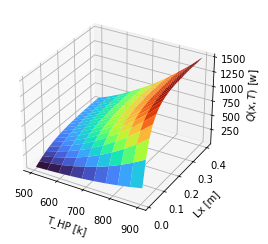

In [26]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, q01, cmap='turbo')
ax.set_xlabel('T_HP [k]')
ax.set_ylabel('Lx [m]')
ax.set_zlabel('$Q(x,T)$ [w]');

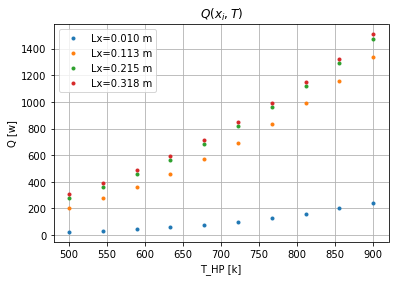

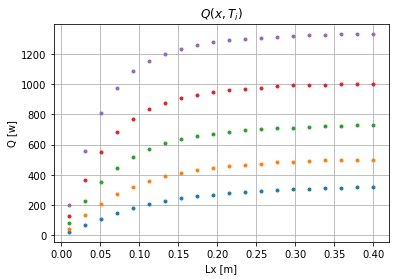

In [27]:
for i in  range(0,N1,5):
    plt.plot(T_cond,q01[i,:],'.',label= f"Lx={Lx[i]:.3f} m")
#plt.plot(z,f1,'.',label= "o1(y)")
#plt.axhline(color="red",y=o_inf, xmin=0, xmax=1,label="$T^*_{inf}$")
#plt.xlim(0,0.25)
#plt.ylim(-1.,1)
plt.xlabel('T_HP [k]')
plt.ylabel('Q [w]')
plt.title('$Q(x_i,T)$')

plt.legend()
plt.grid()
plt.show()

for i in  range(0,N2,2):
    plt.plot(Lx,q01[:,i],'.')#label= f"T_cond={T_cond[i]:.2f} k")
#plt.plot(z,f1,'.',label= "o1(y)")
#plt.axhline(color="red",y=o_inf, xmin=0, xmax=1,label="$T^*_{inf}$")
#plt.xlim(0,0.25)
#plt.ylim(-1.,1)
plt.xlabel('Lx [m]')
plt.ylabel('Q [w]')
plt.title('$Q(x,T_i)$')

#plt.legend()
plt.grid()
plt.show()

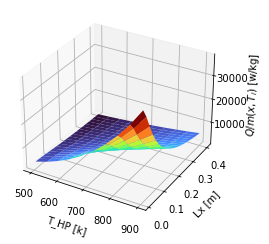

In [28]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, q0_m1, cmap='turbo')
ax.set_xlabel('T_HP [k]')
ax.set_ylabel('Lx [m]')
ax.set_zlabel('$Q/m(x,T_i)$ [w/kg]');

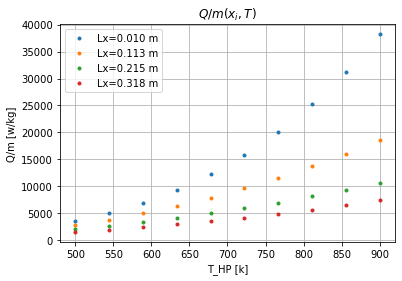

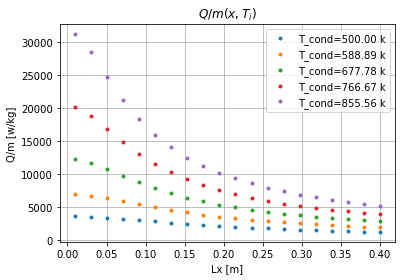

In [29]:
for i in  range(0,N1,5):
    plt.plot(T_cond,q0_m1[i,:],'.',label= f"Lx={Lx[i]:.3f} m")
#plt.plot(z,f1,'.',label= "o1(y)")
#plt.axhline(color="red",y=o_inf, xmin=0, xmax=1,label="$T^*_{inf}$")
#plt.xlim(0,0.25)
#plt.ylim(-1.,1)
plt.xlabel('T_HP [k]')
plt.ylabel('Q/m [w/kg]')
plt.title('$Q/m(x_i,T)$')

plt.legend()
plt.grid()
plt.show()

for i in  range(0,N2,2):
    plt.plot(Lx,q0_m1[:,i],'.',label= f"T_cond={T_cond[i]:.2f} k")
#plt.plot(z,f1,'.',label= "o1(y)")
#plt.axhline(color="red",y=o_inf, xmin=0, xmax=1,label="$T^*_{inf}$")
#plt.xlim(0,0.25)
#plt.ylim(-1.,1)
plt.xlabel('Lx [m]')
plt.ylabel('Q/m [w/kg]')
plt.title('$Q/m(x,T_i)$')

plt.legend()
plt.grid()
plt.show()

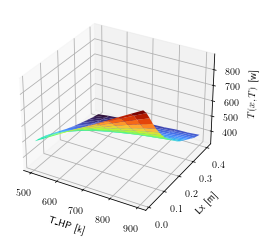

In [663]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, T_1, cmap='turbo')
ax.set_xlabel('T_HP [k]')
ax.set_ylabel('Lx [m]')
ax.set_zlabel('$T(x,T)$ [w]');

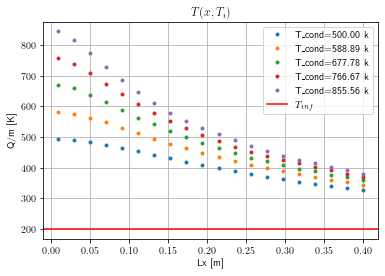

In [664]:
for i in  range(0,N2,2):
    plt.plot(Lx,T_1[:,i],'.',label= f"T_cond={T_cond[i]:.2f} k")
#plt.plot(z,f1,'.',label= "o1(y)")
plt.axhline(color="red",y=T_inf, xmin=0, xmax=1,label="$T_{inf}$")
#plt.xlim(0,0.25)
#plt.ylim(-1.,1)
plt.xlabel('Lx [m]')
plt.ylabel('Q/m [K]')
plt.title('$T(x,T_i)$')

plt.legend()
plt.grid()
plt.show()

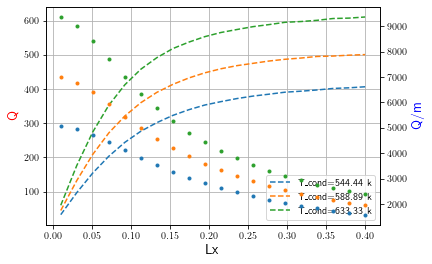

In [666]:
# create figure and axis objects with subplots()

fig,ax = plt.subplots()
# make a plot
for i in  (1,2,3):
    ax.plot(Lx,q01[:,i],'--',label= f"T_cond={T_cond[i]:.2f} k")
# set x-axis label
ax.set_xlabel("Lx", fontsize = 14)
# set y-axis label
ax.set_ylabel("Q",color="red",fontsize=14)
plt.grid()
ax.legend()

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
for i in  (1,2,3):
    ax2.plot(Lx,q0_m1[:,i],'.',label= f"T_cond={T_cond[i]:.2f} k")
ax2.set_ylabel("Q/m",color="blue",fontsize=14)
plt.show()
# save the plot as a file
#fig.savefig('two_different_y_axis_for_single_python_plot_with_twinx.jpg',format='jpeg',dpi=100,bbox_inches='tight')

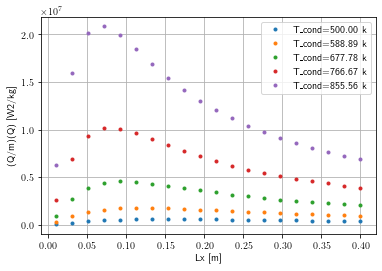

In [667]:
for i in  range(0,N2,2):
    plt.plot(Lx,q0_m1[:,i]*q01[:,i],'.',label= f"T_cond={T_cond[i]:.2f} k")
plt.xlabel('Lx [m]')
plt.ylabel('(Q/m)(Q) [W2/kg]')
#plt.title('$T(x,T_i)$')

plt.legend()
plt.grid()
plt.show()

In [649]:
## con esta funcion puedo tener el indice y el valor de los maximos
def npmax(l):
    max_idx = np.argmax(l)
    max_val = l[max_idx]
    return max_idx, max_val

In [640]:
Lx_optimo=np.zeros(N2)
for i in  range(0,N2,1):
    max_idx,_=npmax(q0_m1[:,i]*q01[:,i])
    Lx_optimo[i]=Lx[max_idx]

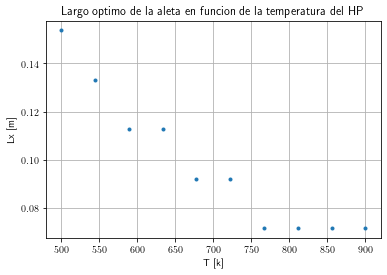

In [668]:
plt.plot(T_cond,Lx_optimo,'.')
plt.ylabel('Lx [m]')
plt.xlabel('T [k]')
plt.title('Largo optimo de la aleta en funcion de la temperatura del HP')
#plt.legend()
plt.grid()
plt.show()

In [642]:
np.mean(Lx_optimo)

0.09826315789473684

## Se elige Lx=0.1m porque es el valor optimo para el rango de operacion del HP
en los paper el valor anda entre 0.08m y 0.1m